# Puntos random y clasificación super sencilla

In [1]:
import numpy as np
import matplotlib.pyplot as plt

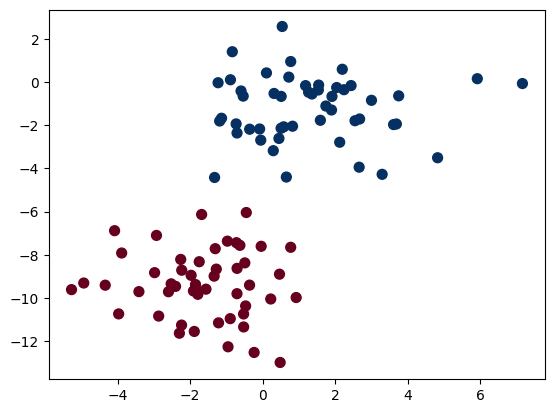

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [11]:
import pickle

with open('models/01_simple_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [8]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(20000, 2)
ynew = model.predict(Xnew)

[0]


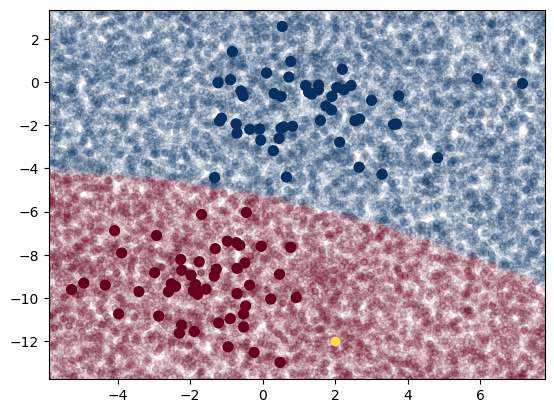

In [27]:
test_point = np.array([2, -12]).reshape(1, -1)
print(model.predict(test_point))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.scatter(test_point[:, 0], test_point[:, 1], c = '#FFDE4D')
plt.axis(lim);

# Clasificación de números

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

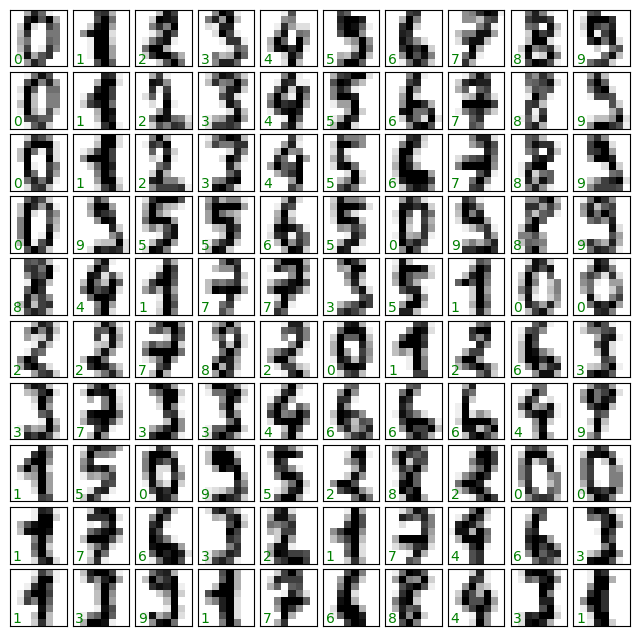

In [29]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [51]:
digits.data.shape

(1797, 64)

In [30]:
# Vamos a reduccionar las dimensiones porque wakala
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/home/bubu/dev/CodigoFacilito-Online-Deployment/venv/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/bubu/dev/CodigoFacilito-Online-Deployment/venv/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [50]:
import pickle

with open('models/02_number_reductor.pkl', 'wb') as f:
    pickle.dump(iso, f)

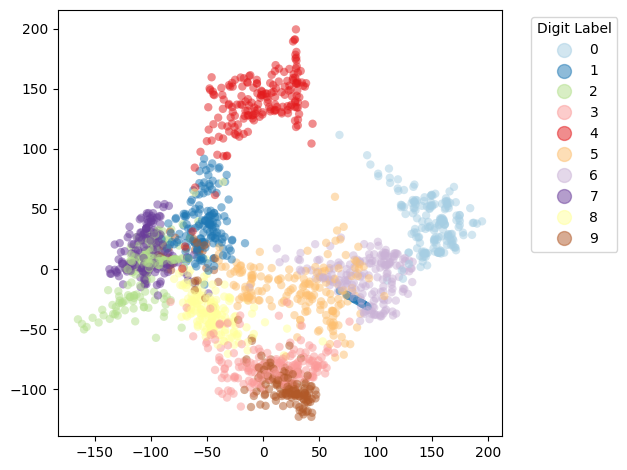

In [32]:
import matplotlib.pyplot as plt
import numpy as np

scatter = plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                      edgecolor='none', alpha=0.5, cmap="Paired")

labels = np.unique(digits.target)
colors = [scatter.cmap(i / max(labels)) for i in labels]
handles = [plt.Line2D([], [], marker='o', linestyle='', color=color,
                      label=label, markersize=10, alpha=0.5) for label, color in zip(labels, colors)]

plt.legend(handles=handles, title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [34]:
X = digits.data
y = digits.target

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(data_projected, y)
y_model = model.predict(data_projected)

In [49]:
import pickle

with open('models/02_number_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

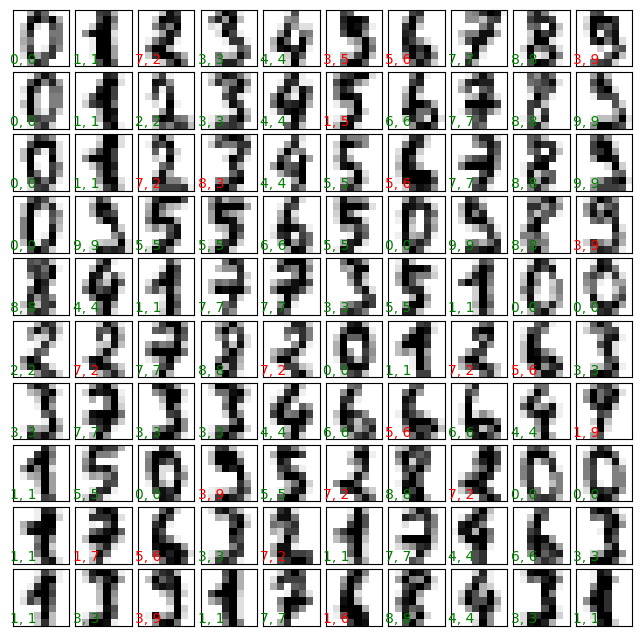

In [36]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(-0.05, 0.05, str(f"{y_model[i]}, {y[i]}"),
            transform=ax.transAxes,
            color='green' if (y[i] == y_model[i]) else 'red')

1


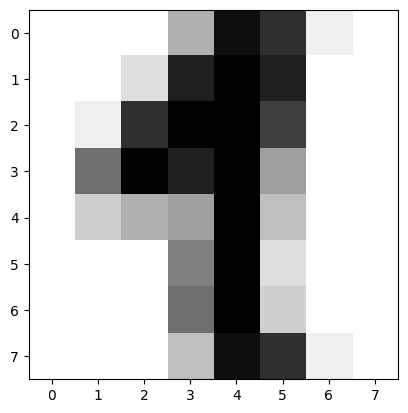

In [53]:
random_digit_index = np.random.choice(digits.images.shape[0])
print(y[random_digit_index])
plt.imshow(test_images[random_digit_index], cmap='binary', interpolation='nearest');